In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
response = requests.get(
    url='https://api.energidataservice.dk/dataset/ConsumptionIndustry?limit=5')

result = response.json()

for k, v in result.items():
    print(k, v)

records = result.get('records', [])
                                           
print('records:')
for record in records:
    print(' ', record)

total 8417514
limit 5
dataset ConsumptionIndustry
records [{'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '101', 'Branche': 'Erhverv', 'ConsumptionkWh': 136147.109}, {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '101', 'Branche': 'Offentligt', 'ConsumptionkWh': 27580.136}, {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '101', 'Branche': 'Privat', 'ConsumptionkWh': 48620.995}, {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '147', 'Branche': 'Erhverv', 'ConsumptionkWh': 12537.914}, {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '147', 'Branche': 'Offentligt', 'ConsumptionkWh': 3743.221}]
records:
  {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04-07T23:00:00', 'MunicipalityNo': '101', 'Branche': 'Erhverv', 'ConsumptionkWh': 136147.109}
  {'HourUTC': '2024-04-07T21:00:00', 'HourDK': '2024-04

In [2]:
dtacon1 = r'C:\Users\juliu\Downloads\PrivIndustryConsumptionSumHour.json'

dtacon1 = pd.read_json(dtacon1)

In [8]:
print(dtacon1.head(5))

               HourUTC               HourDK HousingCategory  \
0  2023-12-31T22:00:00  2023-12-31T23:00:00           Andet   
1  2023-12-31T22:00:00  2023-12-31T23:00:00           Andet   
2  2023-12-31T22:00:00  2023-12-31T23:00:00         Erhverv   
3  2023-12-31T22:00:00  2023-12-31T23:00:00    Etageejendom   
4  2023-12-31T22:00:00  2023-12-31T23:00:00    Etageejendom   

            HeatingCategory  ConsumptionkWh  
0                     Andet       33067.560  
1  Elvarme eller varmepumpe        1911.390  
2                   Erhverv     2761595.271  
3                     Andet      168297.452  
4  Elvarme eller varmepumpe        6958.902  


In [4]:
dtaemis1 = r"C:\Users\juliu\Downloads\CO2Emis.json"

dtaemis1 = pd.read_json(dtaemis1)

In [5]:
print(dtaemis1)

                 Minutes5UTC           Minutes5DK PriceArea  CO2Emission
0        2023-12-31T22:55:00  2023-12-31T23:55:00       DK1          190
1        2023-12-31T22:55:00  2023-12-31T23:55:00       DK2          146
2        2023-12-31T22:50:00  2023-12-31T23:50:00       DK1          190
3        2023-12-31T22:50:00  2023-12-31T23:50:00       DK2          146
4        2023-12-31T22:45:00  2023-12-31T23:45:00       DK1          189
...                      ...                  ...       ...          ...
1051649  2018-12-31T23:10:00  2019-01-01T00:10:00       DK2           81
1051650  2018-12-31T23:05:00  2019-01-01T00:05:00       DK1           85
1051651  2018-12-31T23:05:00  2019-01-01T00:05:00       DK2           85
1051652  2018-12-31T23:00:00  2019-01-01T00:00:00       DK1           89
1051653  2018-12-31T23:00:00  2019-01-01T00:00:00       DK2           89

[1051654 rows x 4 columns]


In [41]:
dtaspot1 = r"C:\Users\juliu\Downloads\Elspotprices.json"

dtaspot1 = pd.read_json(dtaspot1)

In [12]:
dtaspot1['HourDK'] = pd.to_datetime(dtaspot1['HourDK'])

In [3]:
print(dtaspot1)

                    HourUTC               HourDK PriceArea SpotPriceDKK  \
0       2023-12-31T22:00:00  2023-12-31T23:00:00        DE    18.190001   
1       2023-12-31T22:00:00  2023-12-31T23:00:00       DK1   200.309998   
2       2023-12-31T22:00:00  2023-12-31T23:00:00       DK2   200.309998   
3       2023-12-31T22:00:00  2023-12-31T23:00:00       NO2   442.140015   
4       2023-12-31T22:00:00  2023-12-31T23:00:00       SE3   200.309998   
...                     ...                  ...       ...          ...   
306787  2018-12-31T23:00:00  2019-01-01T00:00:00       DK2   211.479996   
306788  2018-12-31T23:00:00  2019-01-01T00:00:00       NO2   364.190002   
306789  2018-12-31T23:00:00  2019-01-01T00:00:00       SE3   211.479996   
306790  2018-12-31T23:00:00  2019-01-01T00:00:00       SE4   211.479996   
306791  2018-12-31T23:00:00  2019-01-01T00:00:00    SYSTEM   332.679993   

        SpotPriceEUR  
0           2.440000  
1          26.870001  
2          26.870001  
3      

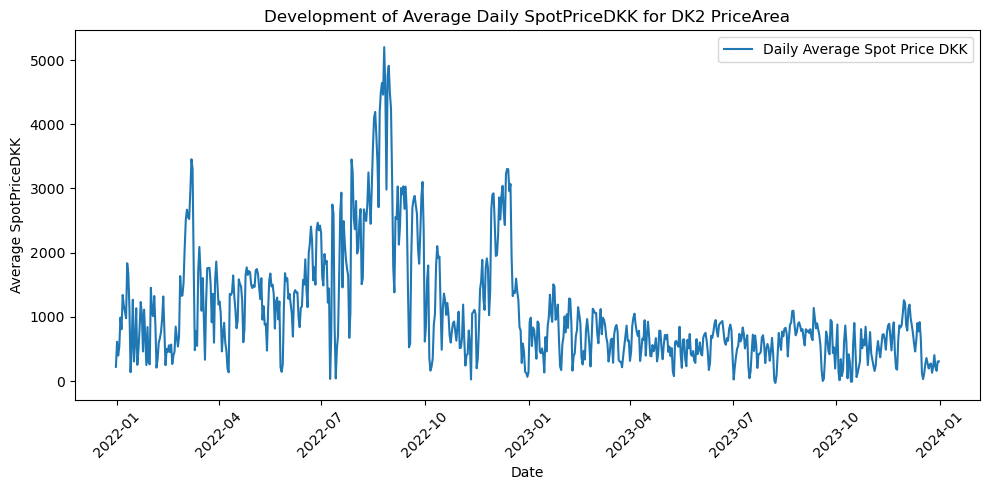

In [32]:
filtered_dtaspot1 = dtaspot1[(dtaspot1['PriceArea'] == 'DK2') & (dtaspot1['HourDK'] >= '2021-12-31T23:00:00') & (dtaspot1['HourDK'] <= '2023-12-31T23:00:00')]
resampled_dtaspot1 = filtered_dtaspot1.set_index('HourDK').resample('D').agg({'SpotPriceDKK': 'mean'})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(resampled_dtaspot1.index, resampled_dtaspot1['SpotPriceDKK'], label='Daily Average Spot Price DKK')
plt.title('Development of Average Daily SpotPriceDKK for DK2 PriceArea')
plt.xlabel('Date')
plt.ylabel('Average SpotPriceDKK')
plt.xticks(rotation=45)  # Rotates the dates for better visibility
plt.legend()
plt.tight_layout()
plt.show()

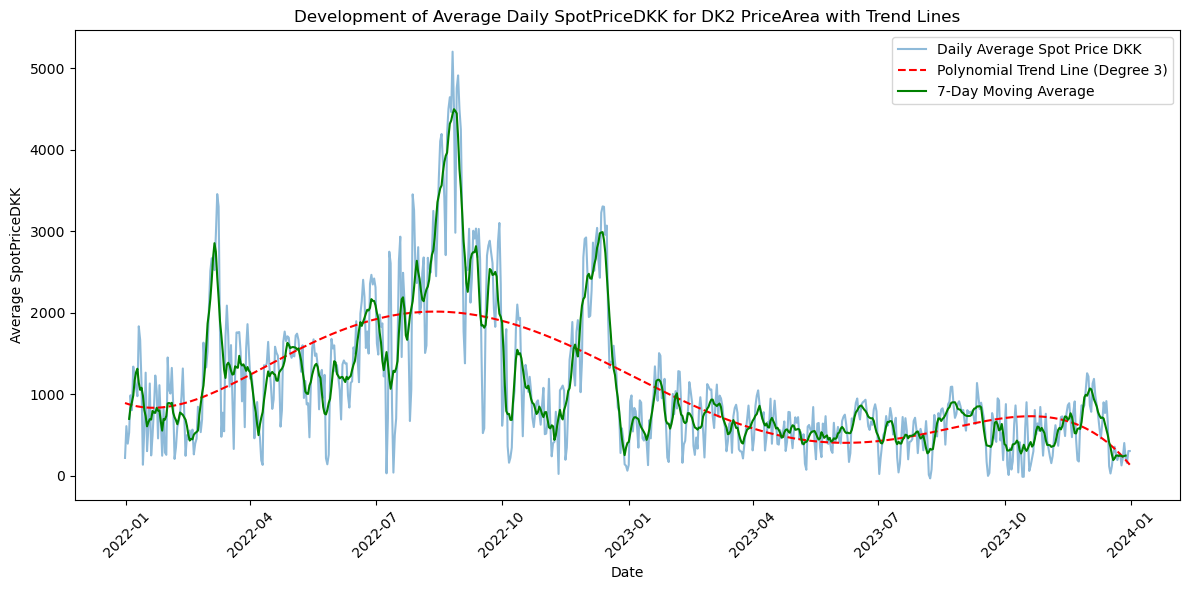

In [34]:
# Prepare data for trend line and moving average
x = np.arange(len(resampled_dtaspot1.index))  # x-axis as days index
y = resampled_dtaspot1['SpotPriceDKK'].values  # y-axis as values

# Calculate coefficients for the polynomial trend line (degree 2)
coefficients = np.polyfit(x, y, 5)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(x)

# Calculate 7-day moving average
moving_average = resampled_dtaspot1['SpotPriceDKK'].rolling(window=7, center=True).mean()

# Plotting the original data, trend line, and moving average
plt.figure(figsize=(12, 6))
plt.plot(resampled_dtaspot1.index, y, label='Daily Average Spot Price DKK', alpha=0.5)  # Original data with partial transparency
plt.plot(resampled_dtaspot1.index, trend_line, label='Polynomial Trend Line (Degree 3)', linestyle='--', color='red')
plt.plot(resampled_dtaspot1.index, moving_average, label='7-Day Moving Average', color='green')
plt.title('Development of Average Daily SpotPriceDKK for DK2 PriceArea with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Average SpotPriceDKK')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

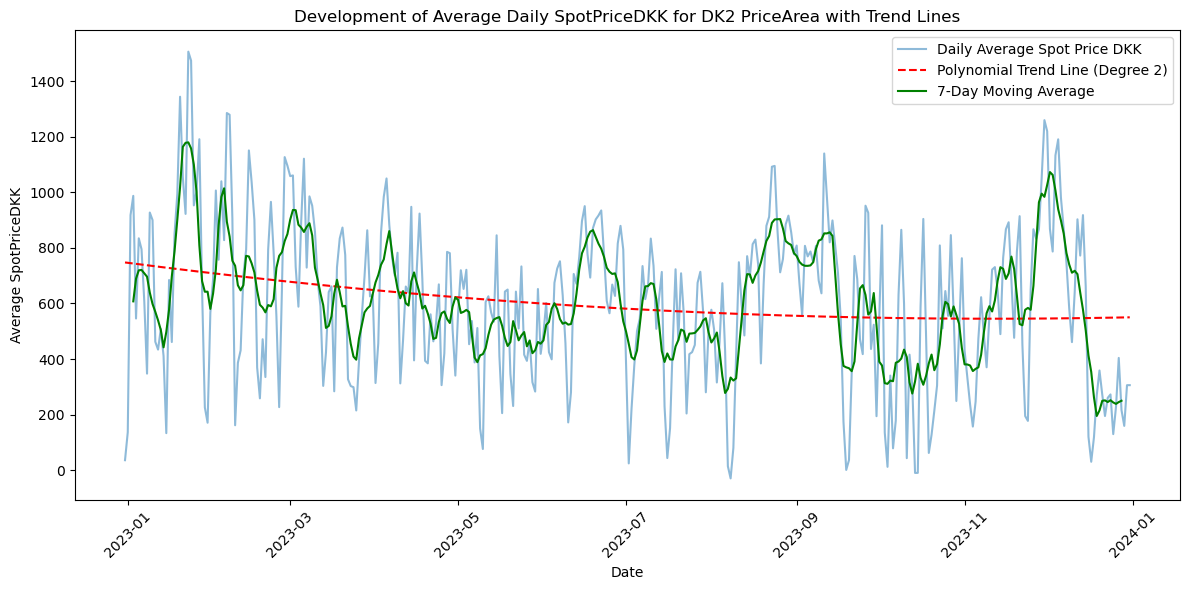

In [36]:
dtaspot1['HourDK'] = pd.to_datetime(dtaspot1['HourDK'])

# Filtering data for DK2 PriceArea and specific date range
filtered_dtaspot1 = dtaspot1[
    (dtaspot1['PriceArea'] == 'DK2') &
    (dtaspot1['HourDK'] >= '2022-12-31T23:00:00') &
    (dtaspot1['HourDK'] <= '2023-12-31T23:00:00')
]

# Resampling to daily averages
resampled_dtaspot1 = filtered_dtaspot1.set_index('HourDK').resample('D').agg({'SpotPriceDKK': 'mean'})

# Prepare data for trend line and moving average
x = np.arange(len(resampled_dtaspot1.index))  # x-axis as days index
y = resampled_dtaspot1['SpotPriceDKK'].values  # y-axis as values

# Polynomial trend line (2nd degree)
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(x)

# 7-day moving average
moving_average = resampled_dtaspot1['SpotPriceDKK'].rolling(window=7, center=True).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resampled_dtaspot1.index, y, label='Daily Average Spot Price DKK', alpha=0.5)  # Original data
plt.plot(resampled_dtaspot1.index, trend_line, label='Polynomial Trend Line (Degree 2)', linestyle='--', color='red')
plt.plot(resampled_dtaspot1.index, moving_average, label='7-Day Moving Average', color='green')
plt.title('Development of Average Daily SpotPriceDKK for DK2 PriceArea with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Average SpotPriceDKK')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

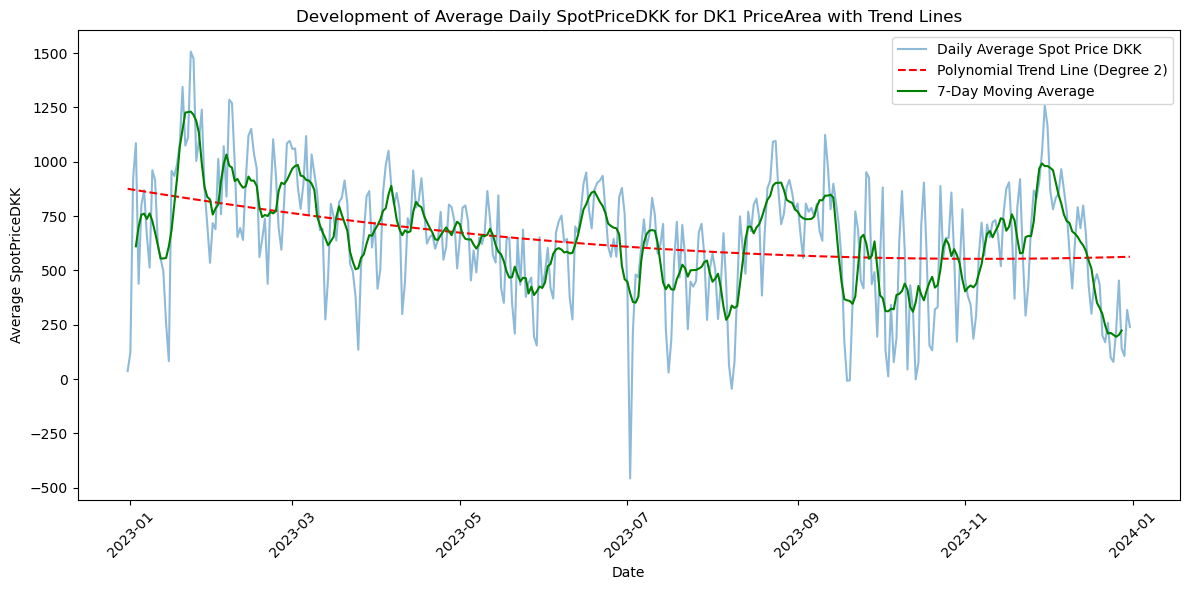

In [38]:
dtaspot1['HourDK'] = pd.to_datetime(dtaspot1['HourDK'])
filtered_dtaspot1 = dtaspot1[(dtaspot1['PriceArea'] == 'DK1') & (dtaspot1['HourDK'] >= '2022-12-31T23:00:00') & (dtaspot1['HourDK'] <= '2023-12-31T23:00:00')]
resampled_dtaspot1 = filtered_dtaspot1.set_index('HourDK').resample('D').agg({'SpotPriceDKK': 'mean'})

# Prepare data for trend line and moving average
x = np.arange(len(resampled_dtaspot1.index))  # x-axis as days index
y = resampled_dtaspot1['SpotPriceDKK'].values  # y-axis as values

# Calculate coefficients for the polynomial trend line (degree 2)
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(x)

# Calculate 7-day moving average
moving_average = resampled_dtaspot1['SpotPriceDKK'].rolling(window=7, center=True).mean()

# Plotting the original data, trend line, and moving average
plt.figure(figsize=(12, 6))
plt.plot(resampled_dtaspot1.index, y, label='Daily Average Spot Price DKK', alpha=0.5)  # Original data with partial transparency
plt.plot(resampled_dtaspot1.index, trend_line, label='Polynomial Trend Line (Degree 2)', linestyle='--', color='red')
plt.plot(resampled_dtaspot1.index, moving_average, label='7-Day Moving Average', color='green')
plt.title('Development of Average Daily SpotPriceDKK for DK1 PriceArea with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Average SpotPriceDKK')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

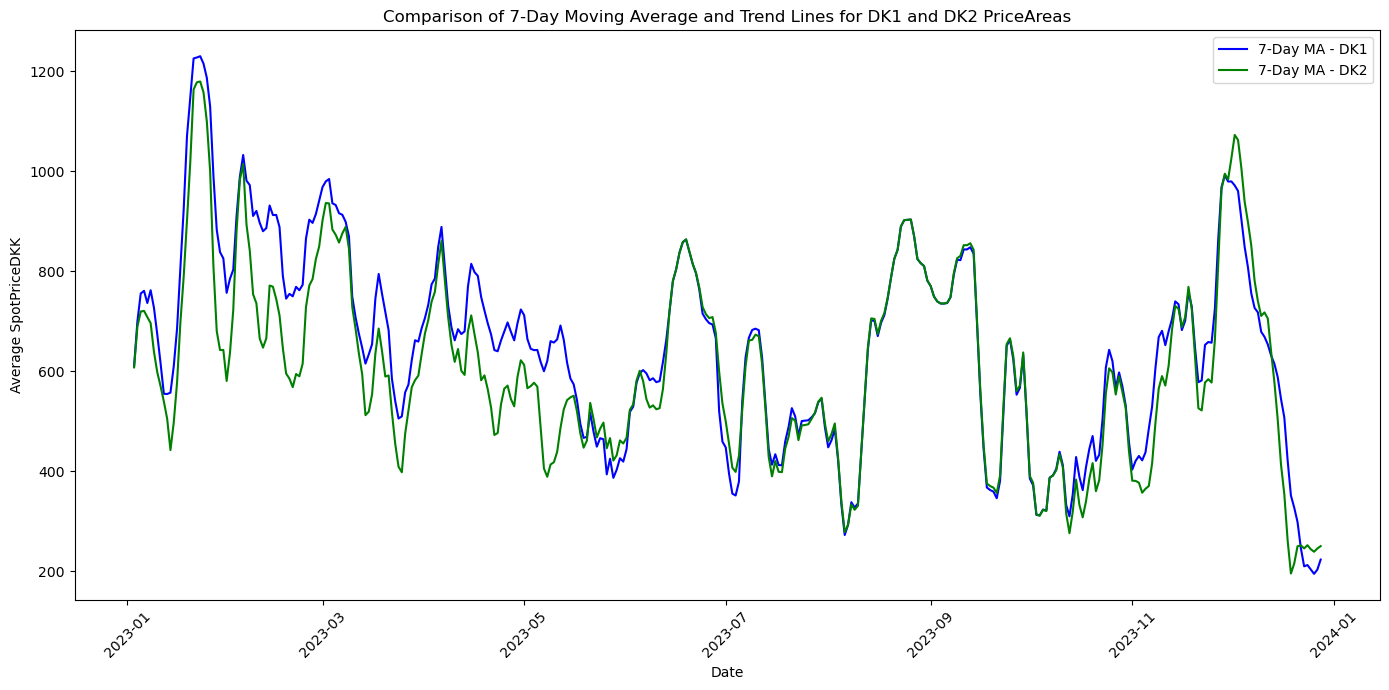

In [41]:
areas = ['DK1', 'DK2']
colors = {'DK1': 'blue', 'DK2': 'green'}  # Different colors for each area

plt.figure(figsize=(14, 7))

for area in areas:
    # Filter data for each PriceArea within the specified date range
    filtered_data = dtaspot1[(dtaspot1['PriceArea'] == area) & 
                             (dtaspot1['HourDK'] >= '2022-12-31T23:00:00') & 
                             (dtaspot1['HourDK'] <= '2023-12-31T23:00:00')]
    resampled_data = filtered_data.set_index('HourDK').resample('D').agg({'SpotPriceDKK': 'mean'})

    # 7-day moving average
    moving_average = resampled_data['SpotPriceDKK'].rolling(window=7, center=True).mean()

    # Prepare data for polynomial trend line
    x = np.arange(len(resampled_data.index))  # Days index
    y = moving_average.values  # Moving average values (ignores NaN)

    # Fit and calculate polynomial trend line (degree 2)
    coefficients = np.polyfit(x[~np.isnan(y)], y[~np.isnan(y)], 2)  # Ignore NaN values for fitting
    polynomial = np.poly1d(coefficients)
    trend_line = polynomial(x)

    # Plotting
    plt.plot(resampled_data.index, moving_average, label=f'7-Day MA - {area}', color=colors[area])

plt.title('Comparison of 7-Day Moving Average and Trend Lines for DK1 and DK2 PriceAreas')
plt.xlabel('Date')
plt.ylabel('Average SpotPriceDKK')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
print(dtacon1.HousingCategory.unique())

['Andet' 'Erhverv' 'Etageejendom' 'Fritidshuse' 'Parcel- og rækkehuse'
 'Ukendt']


In [44]:
print(dtacon1.columns)

Index(['HourUTC', 'HourDK', 'HousingCategory', 'HeatingCategory',
       'ConsumptionkWh'],
      dtype='object')


In [ ]:
dtacon = r'C:\Users\juliu\Downloads\PrivIndustryConsumptionSumHour.json'

dtacon = pd.read_json(dtacon)

In [ ]:
print(graddage)

In [49]:
import json

# Load JSON data from file
with open(r'C:\Users\juliu\Downloads\graddage.json', 'r') as file:
    data = json.load(file)

# Check the type and content of the loaded data
print(type(data))
print(data[:100] if isinstance(data, list) else data)  # Print first 10

<class 'dict'>
{'type': 'FeatureCollection', 'features': [{'geometry': {'coordinates': [11.7644, 55.9594], 'type': 'Point'}, 'id': '0487c6a6-9523-6948-2a4a-35810c1a1dde', 'type': 'Feature', 'properties': {'calculatedAt': '2024-04-18T20:14:10.699000', 'created': '2024-04-18T20:14:21.679008+00:00', 'from': '2024-04-18T00:00:00.001000+02:00', 'parameterId': 'acc_heating_degree_days_17', 'qcStatus': 'none', 'timeResolution': 'day', 'to': '2024-04-19T00:00:00+02:00', 'value': 11.4}}, {'geometry': {'coordinates': [11.7644, 55.9594], 'type': 'Point'}, 'id': '32c9140c-ebf1-102d-654e-9f7b9a14d9ef', 'type': 'Feature', 'properties': {'calculatedAt': '2024-04-18T07:29:08.098000', 'created': '2024-04-18T09:40:08.395810+00:00', 'from': '2024-04-17T00:00:00.001000+02:00', 'parameterId': 'acc_heating_degree_days_17', 'qcStatus': 'manual', 'timeResolution': 'day', 'to': '2024-04-18T00:00:00+02:00', 'value': 10.7}}, {'geometry': {'coordinates': [11.7644, 55.9594], 'type': 'Point'}, 'id': 'b9381c08-dd45-

In [50]:
import json
import pandas as pd
from pandas.io.json import json_normalize

# Load JSON data from file
with open(r'C:\Users\juliu\Downloads\graddage.json', 'r') as file:
    data = json.load(file)

# Extract features list
features = data['features']

# Flatten each feature's properties and merge with some geometry info if needed
flattened_data = []
for feature in features:
    properties = feature['properties']
    geometry = feature['geometry']
    
    # Add some geometry information to properties if needed
    properties['geometry_type'] = geometry['type']
    properties['coordinates'] = geometry['coordinates']

    flattened_data.append(properties)

# Convert to DataFrame
df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame to verify
print(df.head())

                 calculatedAt                           created  \
0  2024-04-18T20:14:10.699000  2024-04-18T20:14:21.679008+00:00   
1  2024-04-18T07:29:08.098000  2024-04-18T09:40:08.395810+00:00   
2  2024-04-17T07:29:06.187000  2024-04-17T13:48:17.953032+00:00   
3  2024-04-16T07:28:15.369000  2024-04-16T08:22:58.741998+00:00   
4  2024-04-15T07:26:44.123000  2024-04-15T08:48:12.354763+00:00   

                               from                 parameterId qcStatus  \
0  2024-04-18T00:00:00.001000+02:00  acc_heating_degree_days_17     none   
1  2024-04-17T00:00:00.001000+02:00  acc_heating_degree_days_17   manual   
2  2024-04-16T00:00:00.001000+02:00  acc_heating_degree_days_17   manual   
3  2024-04-15T00:00:00.001000+02:00  acc_heating_degree_days_17   manual   
4  2024-04-14T00:00:00.001000+02:00  acc_heating_degree_days_17   manual   

  timeResolution                         to  value geometry_type  \
0            day  2024-04-19T00:00:00+02:00   11.4         Point   
1   

In [4]:
import json
import pandas as pd

# Load JSON data from file
with open(r'C:\Users\juliu\Downloads\graddage.json', 'r') as file:
    data = json.load(file)

# Extract features list
features = data['features']

# Prepare the data for DataFrame
flattened_data = []
for feature in features:
    properties = feature['properties']
    
    # Convert 'from' and 'to' to date-only format and pick 'to' as the representation
    date_to = pd.to_datetime(properties['to']).date()  # This converts the timestamp to date
    
    # Prepare a simplified dictionary with only needed data
    simplified_data = {
        'day': date_to,
        'value': properties['value']
    }
    
    flattened_data.append(simplified_data)

# Convert to DataFrame
df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame to verify
print(df.head())

          day  value
0  2024-04-19   11.4
1  2024-04-18   10.7
2  2024-04-17   10.0
3  2024-04-16   10.2
4  2024-04-15    8.6


In [5]:
print(df)

            day  value
0    2024-04-19   11.4
1    2024-04-18   10.7
2    2024-04-17   10.0
3    2024-04-16   10.2
4    2024-04-15    8.6
..          ...    ...
995  2021-07-29    0.0
996  2021-07-28    0.0
997  2021-07-27    0.0
998  2021-07-26    0.0
999  2021-07-25    0.0

[1000 rows x 2 columns]


In [52]:
# Convert 'HourDK' to date-only format for aggregation
dtacon1['day'] = pd.to_datetime(dtacon1['HourDK']).dt.date

# Group by 'day', 'HeatingCategory', and 'HousingCategory', then calculate the total sum for 'ConsumptionkWh'
daily_dtacon1 = dtacon1.groupby(['day', 'HeatingCategory', 'HousingCategory']).agg({
    'ConsumptionkWh': 'sum'  # Calculate the total sum of ConsumptionkWh
}).reset_index()

# Assuming 'df' is the DataFrame we prepared earlier with the 'day' and 'value' columns
# Merge 'df' with the daily aggregated 'dtacon1' based on 'day'
# Adjust the merge keys to include all grouping columns if they are also present in 'df'
merged_df = pd.merge(df, daily_dtacon1, on='day', how='inner')  # Add 'HeatingCategory' and 'HousingCategory' if they exist in 'df'
merged_df.rename(columns={'value': 'graddage'}, inplace=True)
# Assuming dtaspot1 is your DataFrame containing 'SpotPriceDKK', 'HourDK', and 'PriceArea'

# Convert 'HourDK' to date-only format for aggregation
dtaspot1['Date'] = pd.to_datetime(dtaspot1['HourDK']).dt.date

# Filter the DataFrame for the PriceArea "DK2"
dtaspot1_dk2 = dtaspot1[dtaspot1['PriceArea'] == 'DK2']

# Group by the date and calculate the daily average of 'SpotPriceDKK'
daily_avg_spot_price_dk2 = dtaspot1_dk2.groupby('Date')['SpotPriceDKK'].mean().reset_index()
# If you want to merge this with your merged_df which contains consumption data
# Ensure that 'day' column in merged_df is of date type and is named 'Date' to match
merged_df['Date'] = pd.to_datetime(merged_df['day']).dt.date

# Merge the daily average spot price with the filtered consumption data on the date
merged_data = pd.merge(merged_df, daily_avg_spot_price_dk2, on='Date', how='left')
# Display the first few rows of the merged DataFrame to verify
print(merged_df.head())

          day  value HeatingCategory       HousingCategory  ConsumptionkWh
0  2023-12-31   12.5           Andet                 Andet    8.797270e+05
1  2023-12-31   12.5           Andet          Etageejendom    4.868676e+06
2  2023-12-31   12.5           Andet           Fritidshuse    2.261265e+05
3  2023-12-31   12.5           Andet  Parcel- og rækkehuse    1.491808e+07
4  2023-12-31   12.5           Andet                Ukendt    2.736149e+05


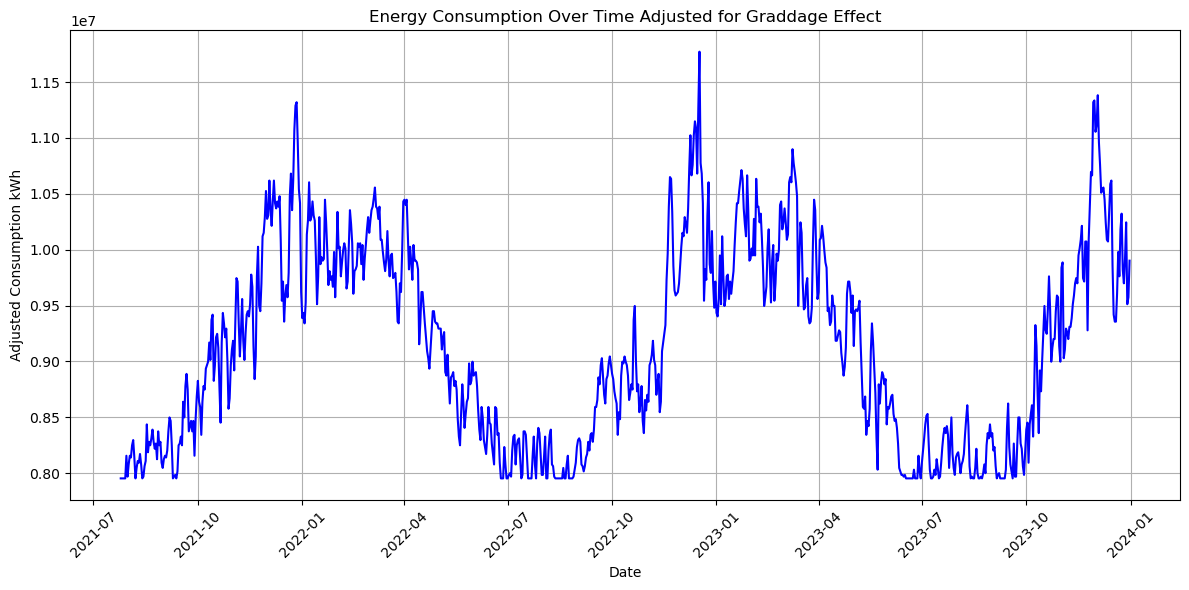

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'day' column is a datetime object
merged_df['day'] = pd.to_datetime(merged_df['day'])

# Sort the DataFrame by 'day' to ensure correct chronological plotting
merged_df.sort_values('day', inplace=True)

# Performing the OLS regression
X = sm.add_constant(merged_df['graddage'])  # Adding a constant for the intercept
model = sm.OLS(merged_df['ConsumptionkWh'], X).fit()
predictions = model.predict(X)  # Predicting ConsumptionkWh based on graddage
residuals = merged_df['ConsumptionkWh'] - predictions  # Calculating residuals

# Adjusted Consumption is the sum of the predicted values (including the average effect of graddage) and the residuals
adjusted_consumption = predictions + residuals.mean()

# Plotting the Adjusted Consumption over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['day'], adjusted_consumption, linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Adjusted Consumption kWh')
plt.title('Energy Consumption Over Time Adjusted for Graddage Effect')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

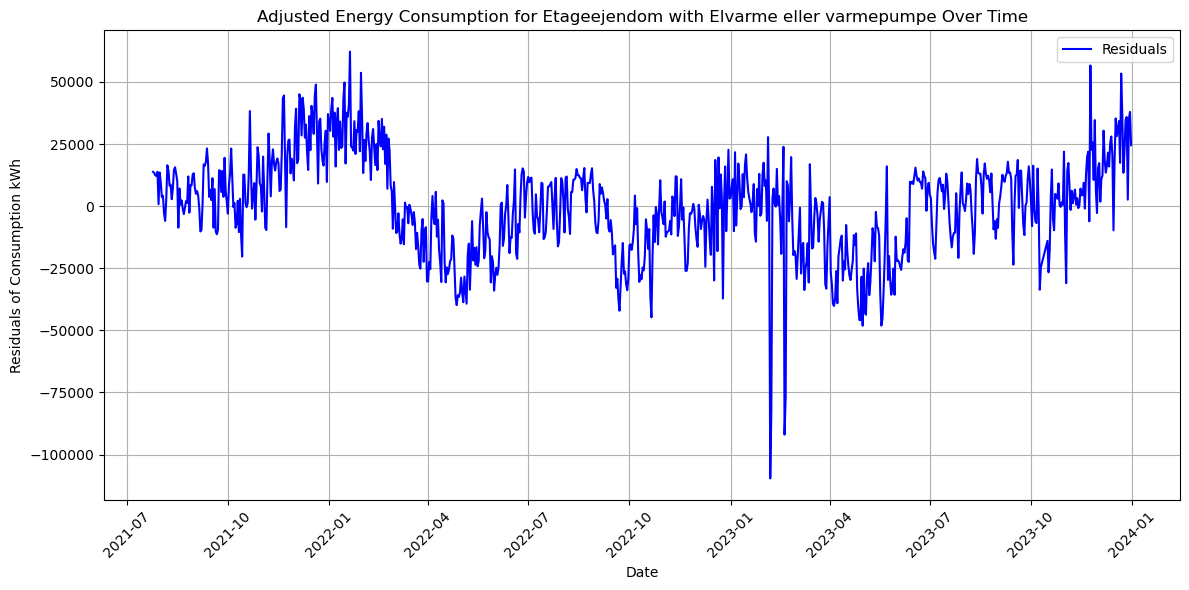

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is your DataFrame and it contains 'HousingCategory', 'HeatingCategory', 'graddage', 'ConsumptionkWh', and 'day'

# Filter the DataFrame for the "Etageejendom" HousingCategory and "Elvarme eller varmepumpe" HeatingCategory
filtered_df = merged_df[
    (merged_df['HousingCategory'] == 'Etageejendom') & 
    (merged_df['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Make sure the 'day' column is of the datetime type and is sorted
filtered_df['day'] = pd.to_datetime(filtered_df['day'])
filtered_df.sort_values('day', inplace=True)

# Conduct the OLS regression only on the filtered data
X = sm.add_constant(filtered_df['graddage'])  # Adding a constant (intercept) to the model
model = sm.OLS(filtered_df['ConsumptionkWh'], X).fit()
filtered_df['residuals'] = model.resid  # Calculate residuals

# Plotting the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['day'], filtered_df['residuals'], linestyle='-', color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals of Consumption kWh')
plt.title('Adjusted Energy Consumption for Etageejendom with Elvarme eller varmepumpe Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [59]:
print(merged_data.head(100))

          day  graddage           HeatingCategory HousingCategory  \
0  2021-07-25       0.0  Elvarme eller varmepumpe    Etageejendom   
1  2021-07-26       0.0  Elvarme eller varmepumpe    Etageejendom   
2  2021-07-27       0.0  Elvarme eller varmepumpe    Etageejendom   
3  2021-07-28       0.0  Elvarme eller varmepumpe    Etageejendom   
4  2021-07-29       0.0  Elvarme eller varmepumpe    Etageejendom   
..        ...       ...                       ...             ...   
95 2021-10-28       4.0  Elvarme eller varmepumpe    Etageejendom   
96 2021-10-29       4.6  Elvarme eller varmepumpe    Etageejendom   
97 2021-10-30       6.5  Elvarme eller varmepumpe    Etageejendom   
98 2021-10-31       7.4  Elvarme eller varmepumpe    Etageejendom   
99 2021-11-01       7.9  Elvarme eller varmepumpe    Etageejendom   

    ConsumptionkWh     residuals        Date  SpotPriceDKK  
0        63661.367  13798.895693  2021-07-25    451.490836  
1        63312.410  13449.938693  2021-07-26    6

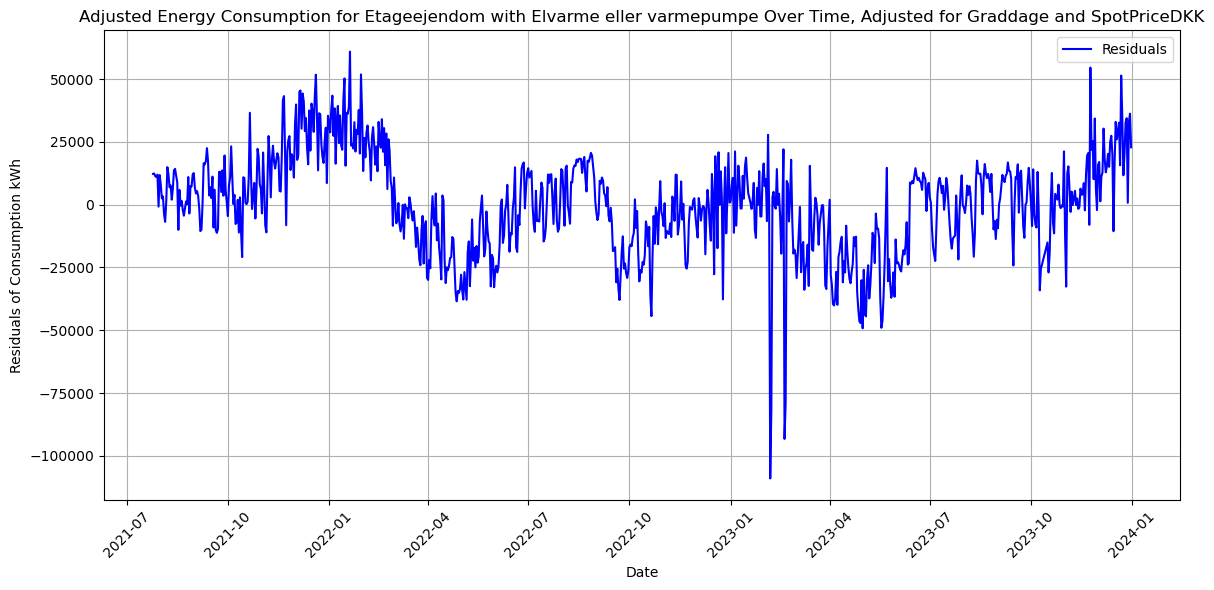

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', and 'day'

# Convert 'day' column to datetime if it's not already
merged_data['day'] = pd.to_datetime(merged_data['day'])

# Sort the DataFrame by 'day' to ensure correct chronological plotting
merged_data.sort_values('day', inplace=True)

# Perform the OLS regression with 'graddage' and 'SpotPriceDKK' as independent variables
X = sm.add_constant(merged_data[['graddage', 'SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(merged_data['ConsumptionkWh'], X).fit()
merged_data['residuals'] = model.resid  # Calculate residuals

# Plotting the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['day'], merged_data['residuals'], linestyle='-', color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals of Consumption kWh')
plt.title('Adjusted Energy Consumption for Etageejendom with Elvarme eller varmepumpe Over Time, Adjusted for Graddage and SpotPriceDKK')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

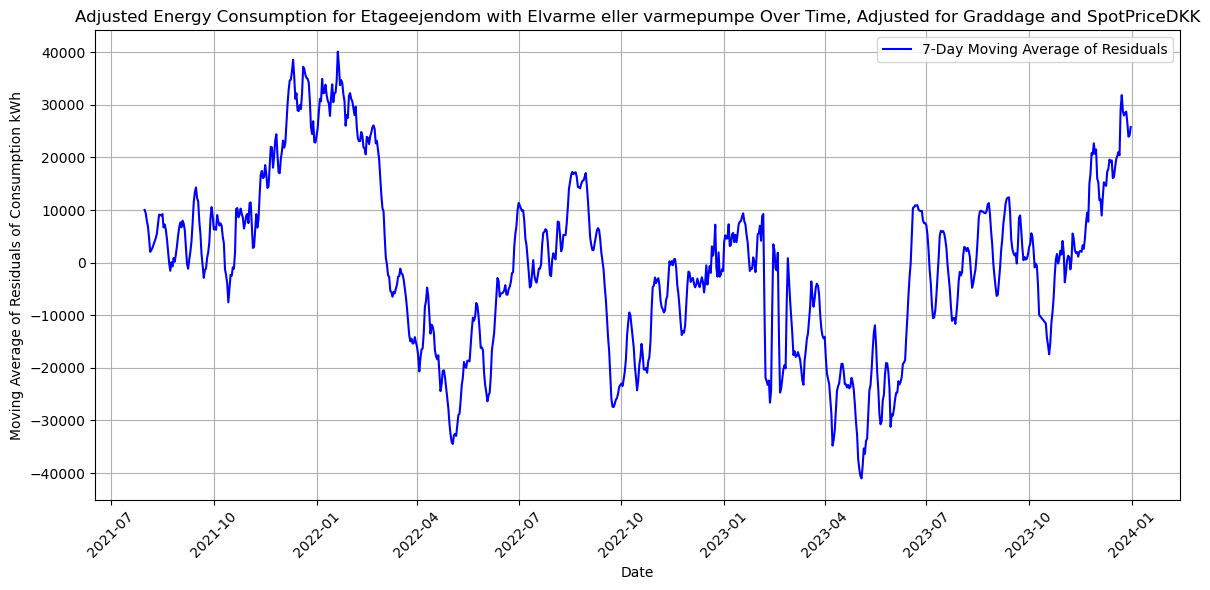

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', and 'day'

# Convert 'day' column to datetime if it's not already
merged_data['day'] = pd.to_datetime(merged_data['day'])

# Sort the DataFrame by 'day' to ensure correct chronological plotting
merged_data.sort_values('day', inplace=True)

# Perform the OLS regression with 'graddage' and 'SpotPriceDKK' as independent variables
X = sm.add_constant(merged_data[['graddage', 'SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(merged_data['ConsumptionkWh'], X).fit()
merged_data['residuals'] = model.resid  # Calculate residuals

# Calculate the 7-day moving average of the residuals
merged_data['residuals_ma'] = merged_data['residuals'].rolling(window=7).mean()

# Plotting the 7-day moving average of the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['day'], merged_data['residuals_ma'], linestyle='-', color='blue', label='7-Day Moving Average of Residuals')
plt.xlabel('Date')
plt.ylabel('Moving Average of Residuals of Consumption kWh')
plt.title('Adjusted Energy Consumption for Etageejendom with Elvarme eller varmepumpe Over Time, Adjusted for Graddage and SpotPriceDKK')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

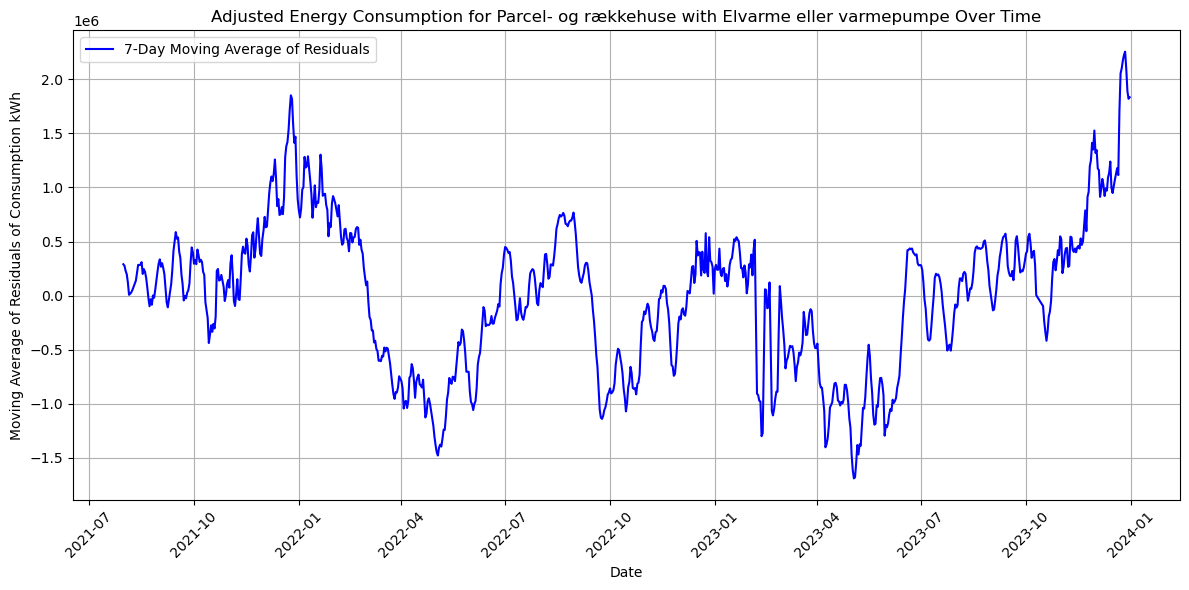

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', 'day', 'HousingCategory', and 'HeatingCategory'

# Filter the DataFrame for the "Parcel- og rækkehuse" HousingCategory and "Elvarme eller varmepumpe" HeatingCategory
parcel_data = merged_data[
    (merged_data['HousingCategory'] == 'Parcel- og rækkehuse') & 
    (merged_data['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Ensure the 'day' column is a datetime type and sorted
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Perform the OLS regression with 'graddage' and 'SpotPriceDKK' as independent variables
X = sm.add_constant(parcel_data[['graddage', 'SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(parcel_data['ConsumptionkWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

# Calculate the 7-day moving average of the residuals
parcel_data['residuals_ma'] = parcel_data['residuals'].rolling(window=7).mean()

# Plotting the 7-day moving average of the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals_ma'], linestyle='-', color='blue', label='7-Day Moving Average of Residuals')
plt.xlabel('Date')
plt.ylabel('Moving Average of Residuals of Consumption kWh')
plt.title('Adjusted Energy Consumption for Parcel- og rækkehuse with Elvarme eller varmepumpe Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

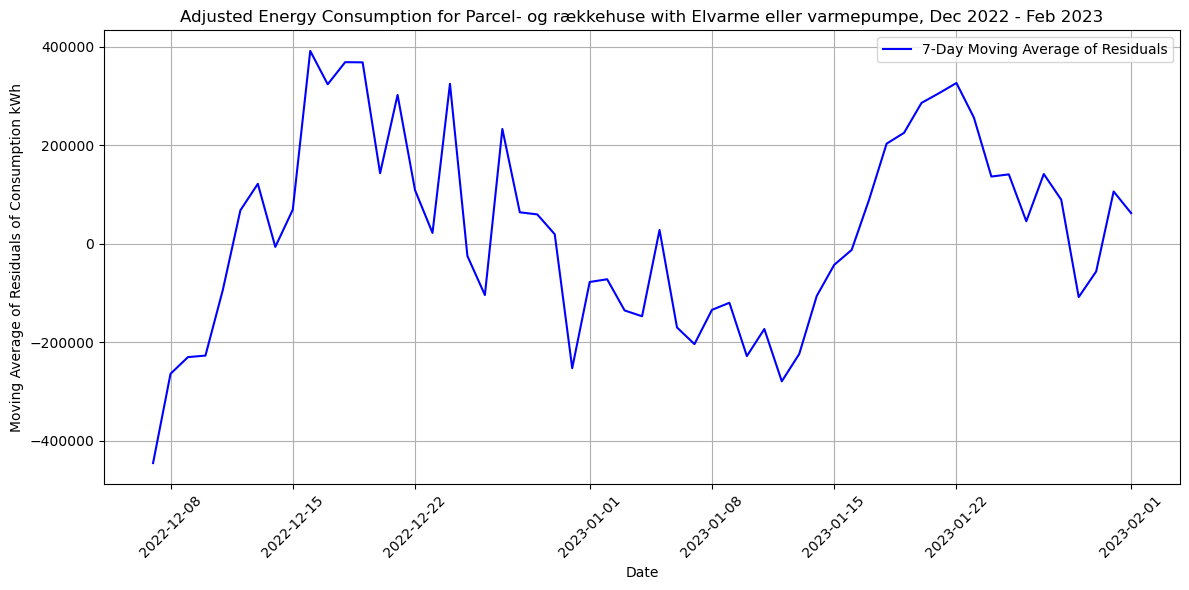

In [70]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming parcel_data is already filtered for "Parcel- og rækkehuse" and "Elvarme eller varmepumpe"
# Now filter this data for the specific date range
start_date = pd.to_datetime('2022-12-01')
end_date = pd.to_datetime('2023-02-01')

# Apply date filter
parcel_data = parcel_data[(parcel_data['day'] >= start_date) & (parcel_data['day'] <= end_date)]

# Ensure the 'day' column is a datetime type and sorted
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Perform the OLS regression with 'graddage' and 'SpotPriceDKK' as independent variables
X = sm.add_constant(parcel_data[['graddage', 'SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(parcel_data['ConsumptionkWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

# Calculate the 7-day moving average of the residuals
parcel_data['residuals_ma'] = parcel_data['residuals'].rolling(window=7).mean()

# Plotting the 7-day moving average of the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals_ma'], linestyle='-', color='blue', label='7-Day Moving Average of Residuals')
plt.xlabel('Date')
plt.ylabel('Moving Average of Residuals of Consumption kWh')
plt.title('Adjusted Energy Consumption for Parcel- og rækkehuse with Elvarme eller varmepumpe, Dec 2022 - Feb 2023')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

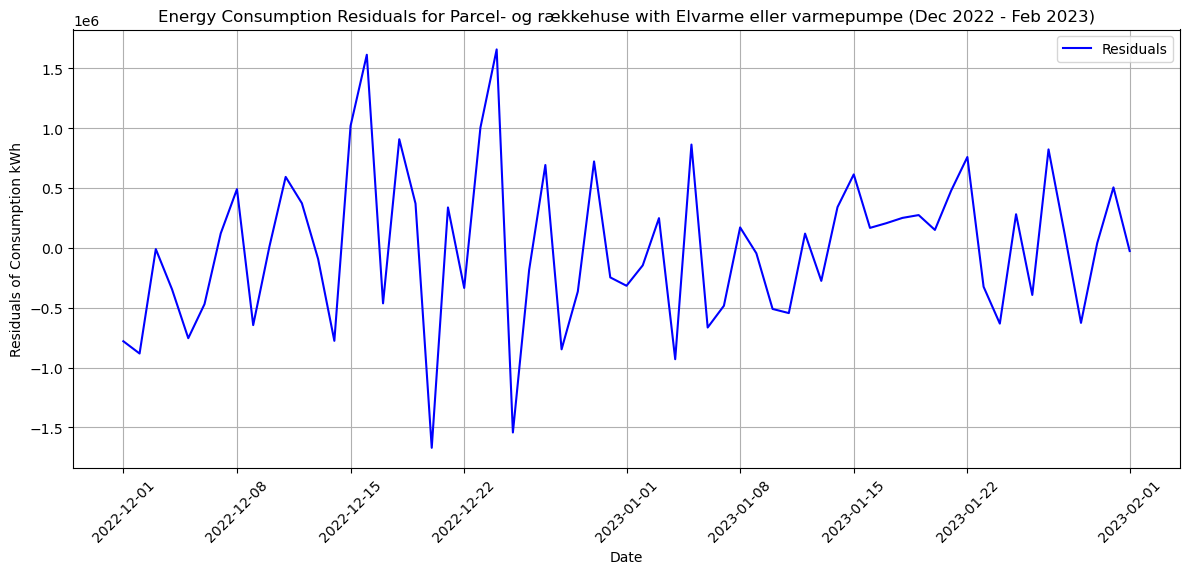

In [67]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', 'day', 'HousingCategory', and 'HeatingCategory'

# Filter the DataFrame for the "Parcel- og rækkehuse" HousingCategory and "Elvarme eller varmepumpe" HeatingCategory
parcel_data = merged_data[
    (merged_data['HousingCategory'] == 'Parcel- og rækkehuse') & 
    (merged_data['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Ensure the 'day' column is a datetime type and sorted
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Limit the data to the specified period
start_date = pd.to_datetime("2022-12-01")
end_date = pd.to_datetime("2023-02-01")
parcel_data = parcel_data[(parcel_data['day'] >= start_date) & (parcel_data['day'] <= end_date)]

# Perform the OLS regression with 'graddage' and 'SpotPriceDKK' as independent variables
X = sm.add_constant(parcel_data[['graddage', 'SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(parcel_data['ConsumptionkWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

# Plotting the residuals over the specified time period
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals'], linestyle='-', color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals of Consumption kWh')
plt.title('Energy Consumption Residuals for Parcel- og rækkehuse with Elvarme eller varmepumpe (Dec 2022 - Feb 2023)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [71]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', 'day', 'HousingCategory', and 'HeatingCategory'

# Filter the DataFrame for the "Parcel- og rækkehuse" HousingCategory and "Elvarme eller varmepumpe" HeatingCategory
parcel_data = merged_data[
    (merged_data['HousingCategory'] == 'Parcel- og rækkehuse') & 
    (merged_data['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Ensure the 'day' column is a datetime type and sorted
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Applying log transformation to the 'ConsumptionkWh' and 'SpotPriceDKK' to stabilize variance and improve model fit
# Note: Ensure there are no zero or negative values in these columns before applying log transformation
parcel_data['log_ConsumptionKWh'] = np.log(parcel_data['ConsumptionkWh'])
parcel_data['log_SpotPriceDKK'] = np.log(parcel_data['SpotPriceDKK'])

# Perform the OLS regression with log-transformed 'graddage' and 'log_SpotPriceDKK' as independent variables
X = sm.add_constant(parcel_data[['graddage', 'log_SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(parcel_data['log_ConsumptionKWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

# Plotting the residuals over the entire period
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals'], linestyle='-', color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals of Log Consumption kWh')
plt.title('Residuals of Log Energy Consumption for Parcel- og rækkehuse with Elvarme eller varmepumpe')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

c:\Users\juliu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MissingDataError: exog contains inf or nans

In [72]:
import pandas as pd

# Assuming merged_data is your DataFrame containing 'SpotPriceDKK'

# Filter to find rows where 'SpotPriceDKK' is less than zero
negative_spot_prices = merged_data[merged_data['SpotPriceDKK'] < 0]

# Print the rows with negative SpotPriceDKK to investigate
print(negative_spot_prices)

             day  graddage           HeatingCategory       HousingCategory  \
770   2023-10-15       6.8                     Andet                Ukendt   
771   2023-10-15       6.8                   Erhverv               Erhverv   
772   2023-10-14       5.0                     Andet                Ukendt   
773   2023-10-14       5.0                   Erhverv               Erhverv   
1410  2023-08-08       2.5                     Andet                 Andet   
1411  2023-08-08       2.5                     Andet          Etageejendom   
1412  2023-08-08       2.5                     Andet           Fritidshuse   
1413  2023-08-08       2.5                     Andet  Parcel- og rækkehuse   
1414  2023-08-08       2.5                     Andet                Ukendt   
1415  2023-08-08       2.5  Elvarme eller varmepumpe                 Andet   
1416  2023-08-08       2.5  Elvarme eller varmepumpe          Etageejendom   
1417  2023-08-08       2.5  Elvarme eller varmepumpe           F

In [74]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming merged_data is your DataFrame containing 'ConsumptionkWh', 'graddage', 'SpotPriceDKK', 'Date', 'day', 'HousingCategory', and 'HeatingCategory'

# Set negative 'SpotPriceDKK' values to zero
merged_data.loc[merged_data['SpotPriceDKK'] < 0, 'SpotPriceDKK'] = 0

# Continue with the data preparation and analysis

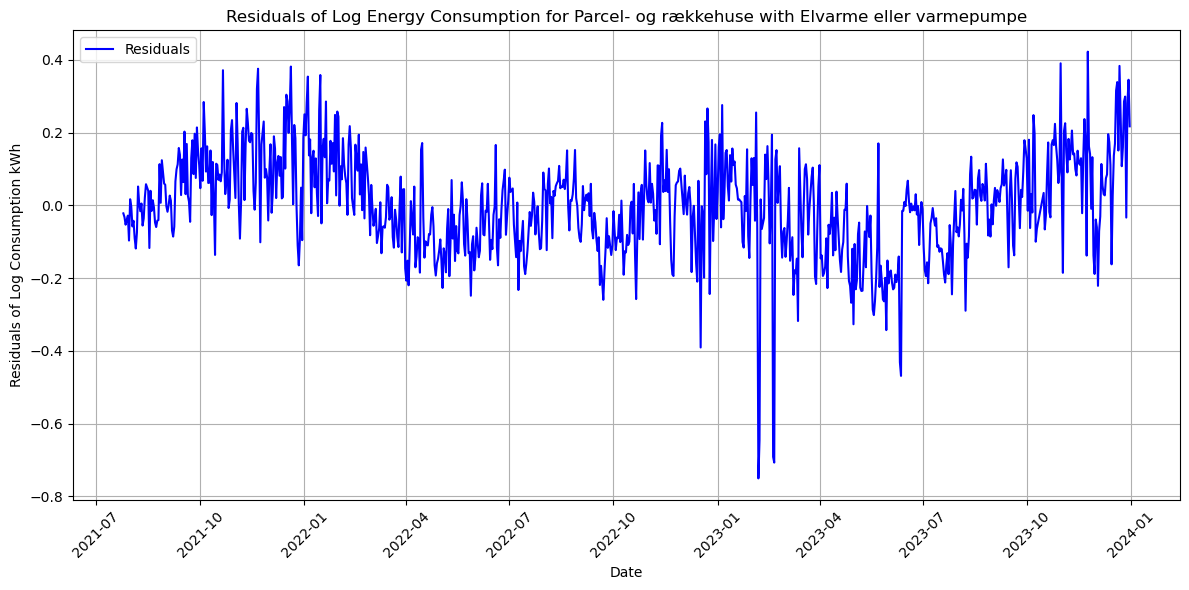

In [75]:
# Filter the DataFrame for the "Parcel- og rækkehuse" HousingCategory and "Elvarme eller varmepumpe" HeatingCategory
parcel_data = merged_data[
    (merged_data['HousingCategory'] == 'Parcel- og rækkehuse') & 
    (merged_data['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Ensure the 'day' column is a datetime type and sorted
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Applying log transformation to 'ConsumptionkWh' and 'SpotPriceDKK' after ensuring there are no zero values
parcel_data['log_ConsumptionKWh'] = np.log(parcel_data['ConsumptionkWh'] + 1)  # +1 to avoid log(0)
parcel_data['log_SpotPriceDKK'] = np.log(parcel_data['SpotPriceDKK'] + 1)  # +1 to handle zeros post-correction

# Perform the OLS regression with log-transformed 'graddage' and 'log_SpotPriceDKK' as independent variables
X = sm.add_constant(parcel_data[['graddage', 'log_SpotPriceDKK']])  # Adding a constant for the intercept
model = sm.OLS(parcel_data['log_ConsumptionKWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

# Plotting the residuals over the entire period
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals'], linestyle='-', color='blue', label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals of Log Consumption kWh')
plt.title('Residuals of Log Energy Consumption for Parcel- og rækkehuse with Elvarme eller varmepumpe')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [76]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming merged_data is your DataFrame containing the required fields

# Replace negative 'SpotPriceDKK' with zero
merged_data.loc[merged_data['SpotPriceDKK'] < 0, 'SpotPriceDKK'] = 0

# Filter for specific Housing and Heating categories
parcel_data = merged_data[
    (merged_data['HousingCategory'] == 'Parcel- og rækkehuse') & 
    (merged_data['HeatingCategory'] == 'Elvarme eller varmepumpe')
].copy()

# Sort and prepare for transformation
parcel_data['day'] = pd.to_datetime(parcel_data['day'])
parcel_data.sort_values('day', inplace=True)

# Log transformation of Consumption and Spot Prices
parcel_data['log_ConsumptionKWh'] = np.log(parcel_data['ConsumptionkWh'] + 1)
parcel_data['log_SpotPriceDKK'] = np.log(parcel_data['SpotPriceDKK'] + 1)

# First differences of the log-transformed variables
parcel_data['diff_log_ConsumptionKWh'] = parcel_data['log_ConsumptionKWh'].diff()
parcel_data['diff_log_SpotPriceDKK'] = parcel_data['log_SpotPriceDKK'].diff()

# Remove the first row since it will have NaN values after differencing
parcel_data = parcel_data.dropna()

In [77]:
# OLS regression on first differences
X = sm.add_constant(parcel_data[['diff_log_SpotPriceDKK', 'graddage']])  # Adding a constant and 'graddage'
model = sm.OLS(parcel_data['diff_log_ConsumptionKWh'], X).fit()
parcel_data['residuals'] = model.resid  # Calculate residuals

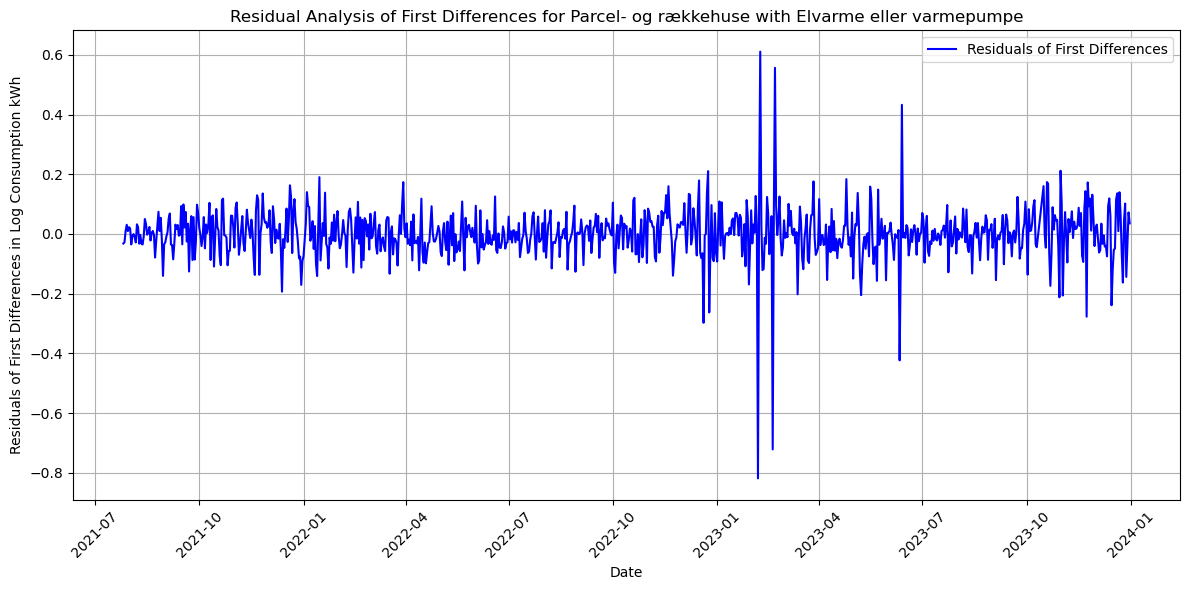

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(parcel_data['day'], parcel_data['residuals'], linestyle='-', color='blue', label='Residuals of First Differences')
plt.xlabel('Date')
plt.ylabel('Residuals of First Differences in Log Consumption kWh')
plt.title('Residual Analysis of First Differences for Parcel- og rækkehuse with Elvarme eller varmepumpe')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()